## **Análisis Exploratorio (EDA)**

**Importamos Librerias**

In [25]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.simplefilter('ignore')

**Cargamos el archivo**

In [26]:
DF_victimas = pd.read_csv("victimas.csv")

**Observamos los datos que contiene el Dataset**

In [27]:
DF_victimas.head() #se muestras las priemros 5 filas del dataset

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,CONDUCTOR,MASCULINO,18.0,SD
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01 00:00:00


In [28]:
DF_victimas.shape #se muestra la cantidad de columnas y filas que tiene el dataset

(717, 5)

In [29]:
DF_victimas.columns #Se muestran las columans del dataset

Index(['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'], dtype='object')

In [30]:
DF_victimas.info() #Observamos tipos de datos de cada columna y si poseen nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   ROL                  717 non-null    object 
 2   SEXO                 717 non-null    object 
 3   EDAD                 717 non-null    float64
 4   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(1), object(4)
memory usage: 28.1+ KB


In [31]:
columnas_interes = ['ID_hecho', 'SEXO', 'ROL','FECHA_FALLECIMIENTO' , 'EDAD']

for columna in columnas_interes:
    porcentaje = (DF_victimas[columna][DF_victimas[columna] == 'SD'].count() / DF_victimas.shape[0]) * 100
    print(f"Porcentaje de 'SD' en {columna} = {porcentaje:.2f}%")

Porcentaje de 'SD' en ID_hecho = 0.00%
Porcentaje de 'SD' en SEXO = 0.84%
Porcentaje de 'SD' en ROL = 1.53%
Porcentaje de 'SD' en FECHA_FALLECIMIENTO = 9.48%
Porcentaje de 'SD' en EDAD = 0.00%


En la columna 'EDAD', asignaremos el valor numérico np.nan a aquellos datos desconocidos o ausentes, para identificar claramente cualquier error o falta de información.

Esta estrategia nos permitirá manejar la columna 'EDAD' como un dato numérico, lo que facilitará la realización de cálculos estadísticos o cualquier análisis que requiera valores numéricos.

In [32]:
DF_victimas['EDAD'] = DF_victimas['EDAD'].replace('SD', np.nan)

In [33]:
DF_victimas['EDAD'].unique()

array([19., 70., 30., 18., 29., 22., 16., 59., 65., 34., 41., 50., 38.,
       21., 52., 36., 20., 54.,  0., 56., 24., 78., 79., 26., 57., 37.,
       58., 23., 60., 42., 53., 51., 40., 87., 76., 75., 35., 80., 43.,
       45., 67., 27., 55., 49., 81., 25., 33., 46., 83., 39., 28.,  7.,
       48.,  4., 82., 32., 17., 47., 61., 10., 95., 73., 84., 66., 85.,
        1., 15., 13., 77., 44., 31., 62., 74., 71., 11., 86., 69., 72.,
       12., 63., 92., 68., 91., 64.,  5., 88.])

In [34]:
DF_victimas.duplicated().sum() #Observamos si tenemos valores duplicados en el dataset


0

In [35]:
DF_victimas.isnull().sum() #Controlamos si tenemos valores faltantes

ID_hecho               0
ROL                    0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

**Outliers**

In [36]:
DF_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   ROL                  717 non-null    object 
 2   SEXO                 717 non-null    object 
 3   EDAD                 717 non-null    float64
 4   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(1), object(4)
memory usage: 28.1+ KB


En esta sección, nos enfocaremos en identificar los valores atípicos del conjunto de datos, es decir, aquellos valores que se encuentran fuera del rango en el que se concentra la mayoría de las muestras.

**Previo a la identificación de estos valores, definiremos las columnas que queremos analizar.**

En este caso seran: EDAD, AAAA, MM y DD

In [37]:
DF_homicidios = pd.read_csv("homicidios.csv") #cargo el dataset de Homicidios por que en este dataset tengo las columnas de Año, Mes y Dia.

In [38]:
DF_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'coordenada_x', 'coordenada_y'],
      dtype='object')

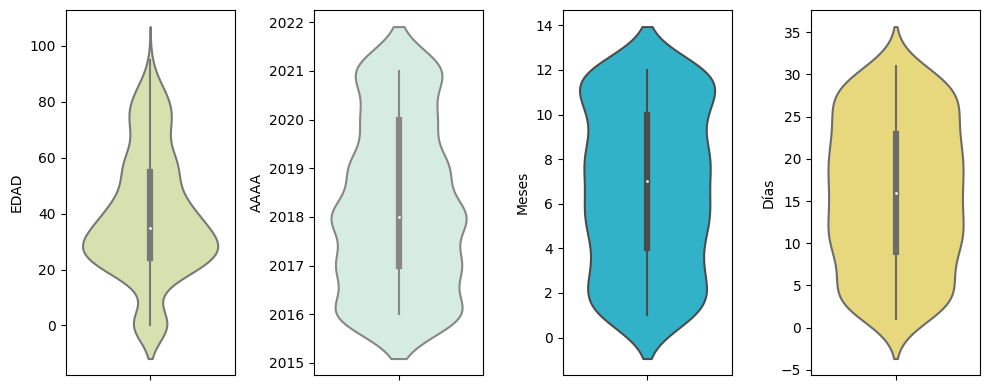

In [39]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos de violín
plt.subplot(1, 4, 1) 
sns.violinplot(data=DF_victimas, y='EDAD', color = "#dce9a8")
plt.ylabel('EDAD')

plt.subplot(1, 4, 2) 
sns.violinplot(data=DF_homicidios, y='AAAA', color = "#d2efe3")
plt.ylabel('AAAA')

plt.subplot(1, 4, 3) 
sns.violinplot(data=DF_homicidios, y='MM', color = "#19c4e1")
plt.ylabel('Meses')

plt.subplot(1, 4, 4) 
sns.violinplot(data=DF_homicidios, y='DD', color = "#f8e46c")
plt.ylabel('Días')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Cada uno de los gráficos presentados anteriormente muestra una distribución de las ocurrencias según la variable analizada.

En el gráfico de la variable 'EDAD', se observa un valor atípico, que corresponde al marcador de error 999 que se imputó en el paso anterior. Por lo tanto, podemos descartarlo y concluir que no existen valores atípicos en ninguna de las otras variables numéricas.

**Utilizando los siguientes gráficos y estadísticas, nuestro objetivo es comprender en profundidad la información de cada variable.**

Vamos a trabajar con la columna 'EDAD'

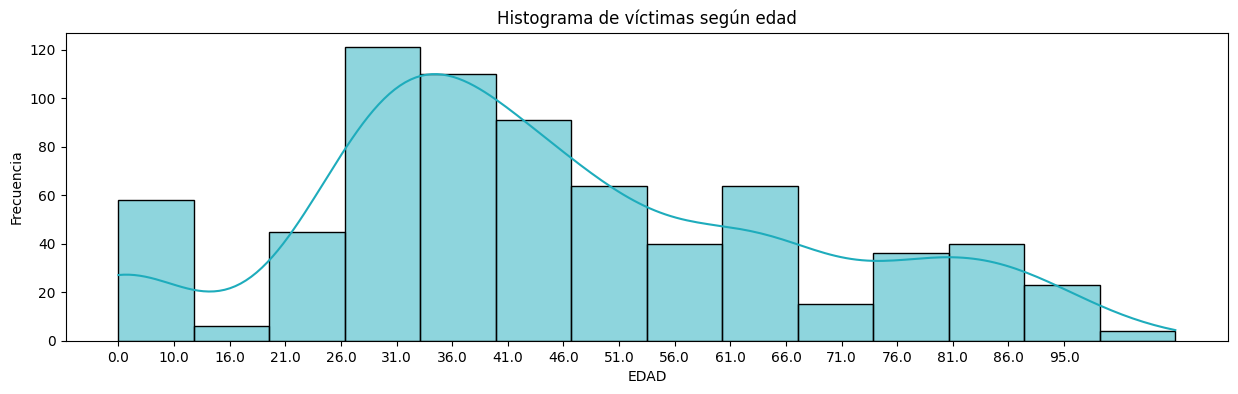

In [40]:
df_filtrado = DF_victimas[DF_victimas['EDAD'].notna()].sort_values(by='EDAD')

plt.figure(figsize=(15, 4))

sns.histplot(df_filtrado['EDAD'], kde=True, color='#1eacbc')

# Personaliza las etiquetas en el eje x
xticks_labels = df_filtrado['EDAD'].unique()[::5]
plt.xticks(range(0, len(xticks_labels) * 5, 5), xticks_labels)

plt.xlabel('EDAD')
plt.ylabel('Frecuencia')
plt.title('Histograma de víctimas según edad')

plt.show()

El histograma muestra que la mayoría de las víctimas tienen edades comprendidas entre 20 y 40 años.

La baja incidencia de víctimas antes de los 20 años podría relacionarse con la edad mínima requerida para obtener la licencia de conducir.

Después de este rango, se observa una tendencia a la disminución en las edades superiores a los 40 años.

**Trabajamos con la columna Año**

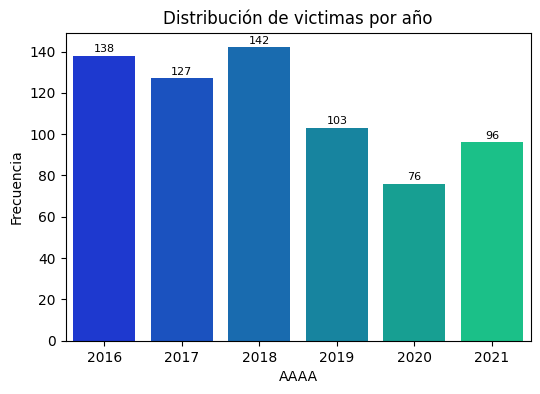

In [41]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(DF_homicidios, x='AAAA', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('AAAA')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por año')

plt.show()

Al igual que sucede con el dataset de HECHOS, podemos observar que en los años previos a la pandemia, se mantenía un nivel constante de víctimas.

Sin embargo, tras la aparición del COVID-19 y la implementación de medidas de confinamiento, se ha observado una disminución en la cantidad de accidentes y, por consiguiente, en los homicidios por siniestros viales.

**Trabajamos con la columna Mes**

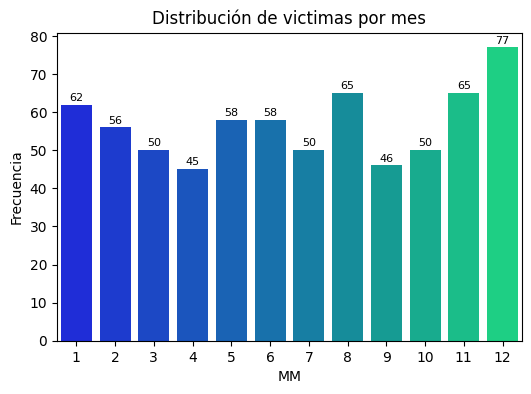

In [42]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(DF_homicidios, x='MM', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('MM')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por mes')

plt.show()

Diciembre destaca como el mes con mayor cantidad de siniestros y víctimas.

En principio, al igual que analizamos con los hechos, este fenómeno podría relacionarse con las festividades de fin de año. Durante este período, el aumento significativo del tráfico y la congestión vial pueden propiciar más accidentes y, por ende, un mayor número de víctimas en los siniestros viales.

**Trabajamos con la columna'ROL'**

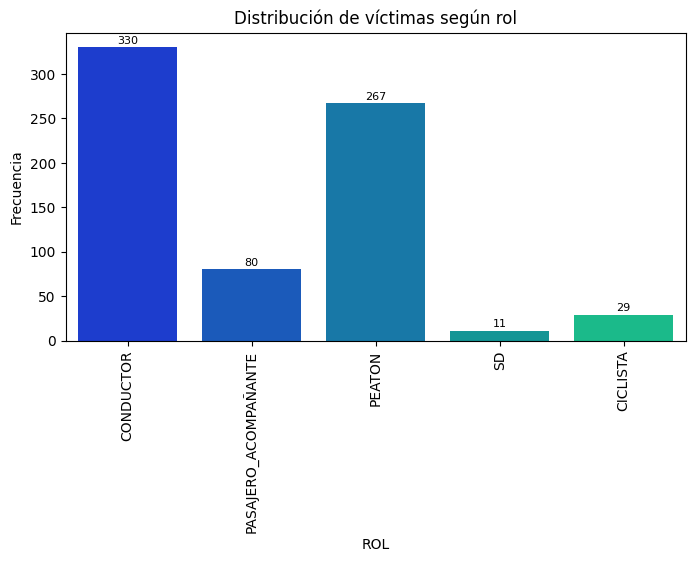

In [43]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(DF_victimas, x='ROL', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90) 

plt.xlabel('ROL')
plt.ylabel('Frecuencia')
plt.title('Distribución de víctimas según rol')

plt.show()

Según el análisis del rol de los involucrados en los siniestros viales, se observa que en la mayoría de los casos, las víctimas fatales son los conductores, seguidos por los peatones.

**Trabajamos con la columna 'SEXO'**

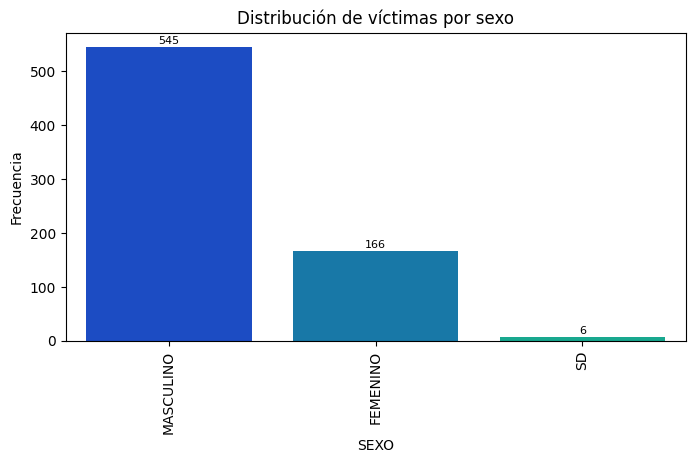

In [44]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(DF_victimas, x='SEXO', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)

plt.xlabel('SEXO')
plt.ylabel('Frecuencia')
plt.title('Distribución de víctimas por sexo')

plt.show()

Es evidente que la mayoría de las víctimas son hombres, con un porcentaje del 76%, lo que indica una probabilidad considerablemente mayor de accidentes entre hombres. Se plantea la hipótesis de que el género de las víctimas podría estar relacionado con esta distribución desigual.


[]

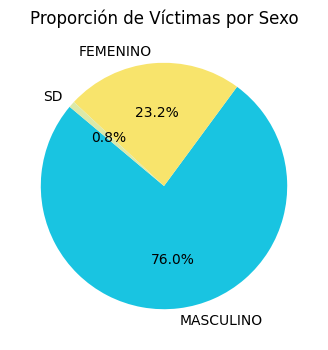

In [45]:
# Calculamos proporciones
proporcion = DF_victimas['SEXO'].value_counts(normalize=True) * 100

etiquetas = proporcion.index
tamaño = proporcion.values

plt.figure(figsize=(10, 4))
plt.title('Proporción de Víctimas por Sexo')

plt.pie(tamaño, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#19C4E1', '#F8E46C','#DCE9A8'])

plt.plot()

**Trabajamos con las columnas 'ROL' y 'SEXO'

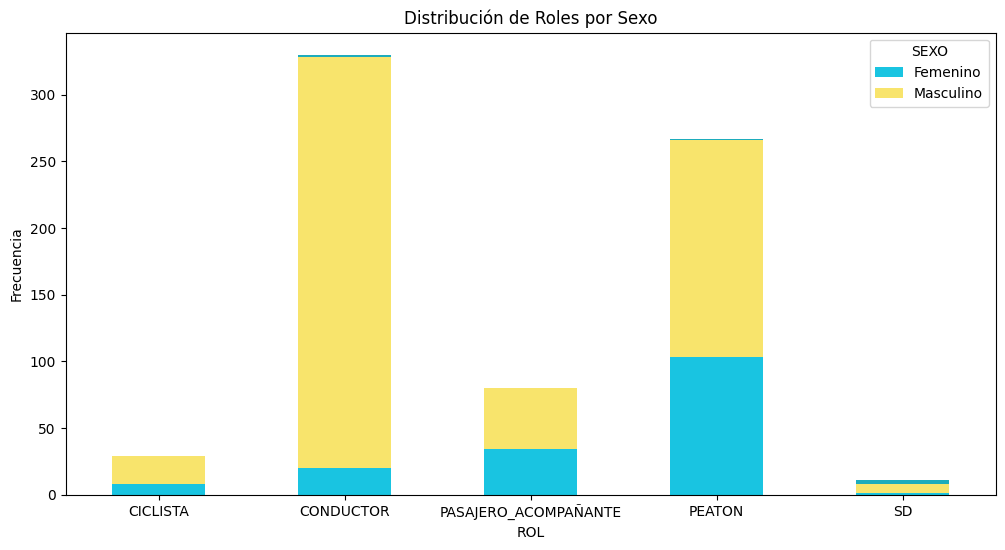

In [46]:
# Crear una tabla de contingencia
tabla = pd.crosstab(DF_victimas['ROL'], DF_victimas['SEXO'])

# Crear un gráfico de barras apiladas
graf = tabla.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#19C4E1', '#F8E46C','#1EACBC'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('ROL')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = graf.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='SEXO')

plt.xticks(rotation=0)
plt.show()

Destacamos que los accidentes donde la víctima es el conductor, en su gran mayoría el sexo del mismo es Masculin